# t-SNE visualization of CIFAR-100 models

In [2]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch
import os

from models import cifar_model_dict
from dataset import get_dataset
from util import load_checkpoint
from config import cfg
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
def get_tsne(stu, mpath):
    train_loader, val_loader, num_data, num_classes = get_dataset("cifar100", 16, 16, 0)
    model = cifar_model_dict[stu][0](num_classes=num_classes)
    model.load_state_dict(load_checkpoint(mpath)["model"])
    all_features, all_labels = [], []
    model.eval()
    with torch.no_grad():
        for i, (data, labels) in tqdm(enumerate(val_loader)):
            outputs, features = model(data)
            all_features.append(features['pooled_feat'].data.cpu().numpy())
            all_labels.append(labels.data.cpu().numpy())
    all_features = np.concatenate(all_features, 0)
    all_labels = np.concatenate(all_labels, 0)

    tsne = TSNE()
    all_features = tsne.fit_transform(all_features)
    plot_features(all_features, all_labels, num_classes)

def plot_features(features, labels, num_classes):
    colors = ['C' + str(i) for i in range(num_classes)]
    
    plt.figure(figsize=(6, 6))
    for l in range(num_classes):
        plt.scatter(
            features[labels == l, 0],
            features[labels == l, 1],
            c=colors[l], s=1, alpha=0.4)
    plt.xticks([])
    plt.yticks([])
    plt.show()

Files already downloaded and verified
Files already downloaded and verified


625it [00:35, 17.76it/s]
/home/ma_wang/.pyenv/versions/miniconda3-latest/envs/pytorch2.0/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ma_wang/.pyenv/versions/miniconda3-latest/envs/pytorch2.0/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


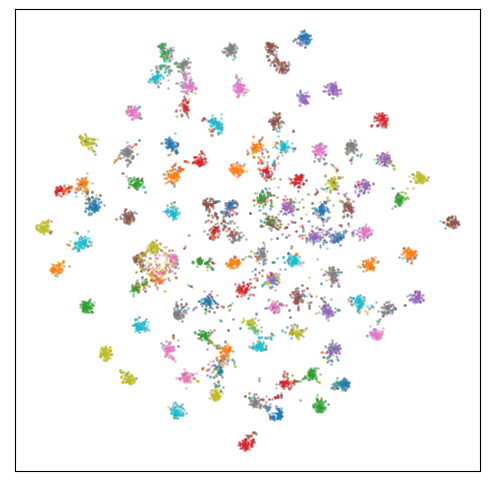

In [16]:
mpath = "runs/cifar100/res110/Feature_Best_run2_model1.pth"
get_tsne("resnet110", mpath)

In [4]:
mpath = "runs/cifar100/res110/resnet110_baseline8.pth"
get_tsne("resnet110", mpath)

Files already downloaded and verified
Files already downloaded and verified


1it [00:00,  2.14it/s]


KeyboardInterrupt: 

Files already downloaded and verified
Files already downloaded and verified


625it [03:16,  3.18it/s]
/home/ma_wang/.pyenv/versions/miniconda3-latest/envs/pytorch2.0/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ma_wang/.pyenv/versions/miniconda3-latest/envs/pytorch2.0/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


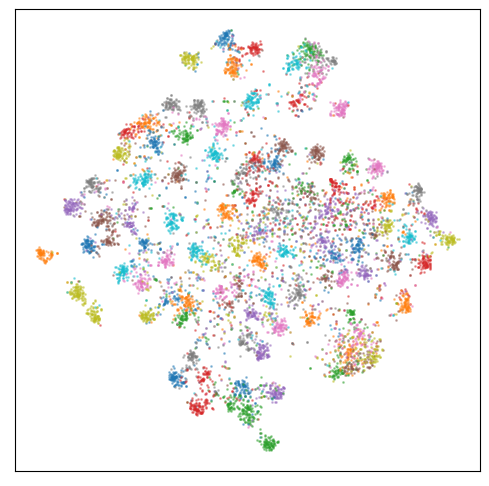

In [6]:
mpath = "runs/cifar100/res110/DML_run1_model1.pth"
get_tsne("resnet110", mpath)

In [ ]:
model = cifar_model_dict['wrn_40_2'][0](num_classes=100)
sum(dict((p.data_ptr(), p.numel()) for p in model.parameters()).values())

2255156